In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../BTCUSDT_1d_full_klines.csv')

In [4]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
0,2022-10-30,20809.68,20931.21,20515.00,20627.48,192795.60886,2022-10-30 23:59:59.999,3.994389e+09,4920007,96047.94574,1.990077e+09
1,2022-10-31,20627.48,20845.92,20237.95,20490.74,303567.61628,2022-10-31 23:59:59.999,6.226304e+09,6571526,151222.29645,3.101778e+09
2,2022-11-01,20490.74,20700.00,20330.74,20483.62,279932.43771,2022-11-01 23:59:59.999,5.740103e+09,5971938,139277.94706,2.856018e+09
3,2022-11-02,20482.81,20800.00,20048.04,20151.84,373716.27299,2022-11-02 23:59:59.999,7.633404e+09,7431698,185785.97212,3.795165e+09
4,2022-11-03,20151.84,20393.32,20031.24,20207.82,319185.15440,2022-11-03 23:59:59.999,6.461673e+09,6948227,159939.61870,3.237969e+09


In [5]:
df.tail()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume
995,2025-07-21,117265.11,119676.73,116515.00,117380.36,17107.33128,2025-07-21 23:59:59.999,2.020783e+09,2509543,8426.31812,9.951172e+08
996,2025-07-22,117380.36,120247.80,116128.00,119954.42,20959.12973,2025-07-22 23:59:59.999,2.481253e+09,2778733,10811.45507,1.280627e+09
997,2025-07-23,119954.43,120090.00,117301.00,118755.99,14558.75083,2025-07-23 23:59:59.999,1.722127e+09,2101404,7070.08701,8.362663e+08
998,2025-07-24,118756.00,119450.00,117103.10,118340.99,15806.89043,2025-07-24 23:59:59.999,1.873182e+09,2081435,7651.73992,9.066191e+08
999,2025-07-25,118340.98,118451.57,114723.16,115863.67,30456.62389,2025-07-25 23:59:59.999,3.533663e+09,2415832,13099.87753,1.519985e+09


In [6]:
# let's make a price_range column 
df['price_range'] = df['high'] - df['low']

In [7]:
df.head()

,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,price_range
0,2022-10-30,20809.68,20931.21,20515.00,20627.48,192795.60886,2022-10-30 23:59:59.999,3.994389e+09,4920007,96047.94574,1.990077e+09,416.21
1,2022-10-31,20627.48,20845.92,20237.95,20490.74,303567.61628,2022-10-31 23:59:59.999,6.226304e+09,6571526,151222.29645,3.101778e+09,607.97
2,2022-11-01,20490.74,20700.00,20330.74,20483.62,279932.43771,2022-11-01 23:59:59.999,5.740103e+09,5971938,139277.94706,2.856018e+09,369.26
3,2022-11-02,20482.81,20800.00,20048.04,20151.84,373716.27299,2022-11-02 23:59:59.999,7.633404e+09,7431698,185785.97212,3.795165e+09,751.96
4,2022-11-03,20151.84,20393.32,20031.24,20207.82,319185.15440,2022-11-03 23:59:59.999,6.461673e+09,6948227,159939.61870,3.237969e+09,362.08


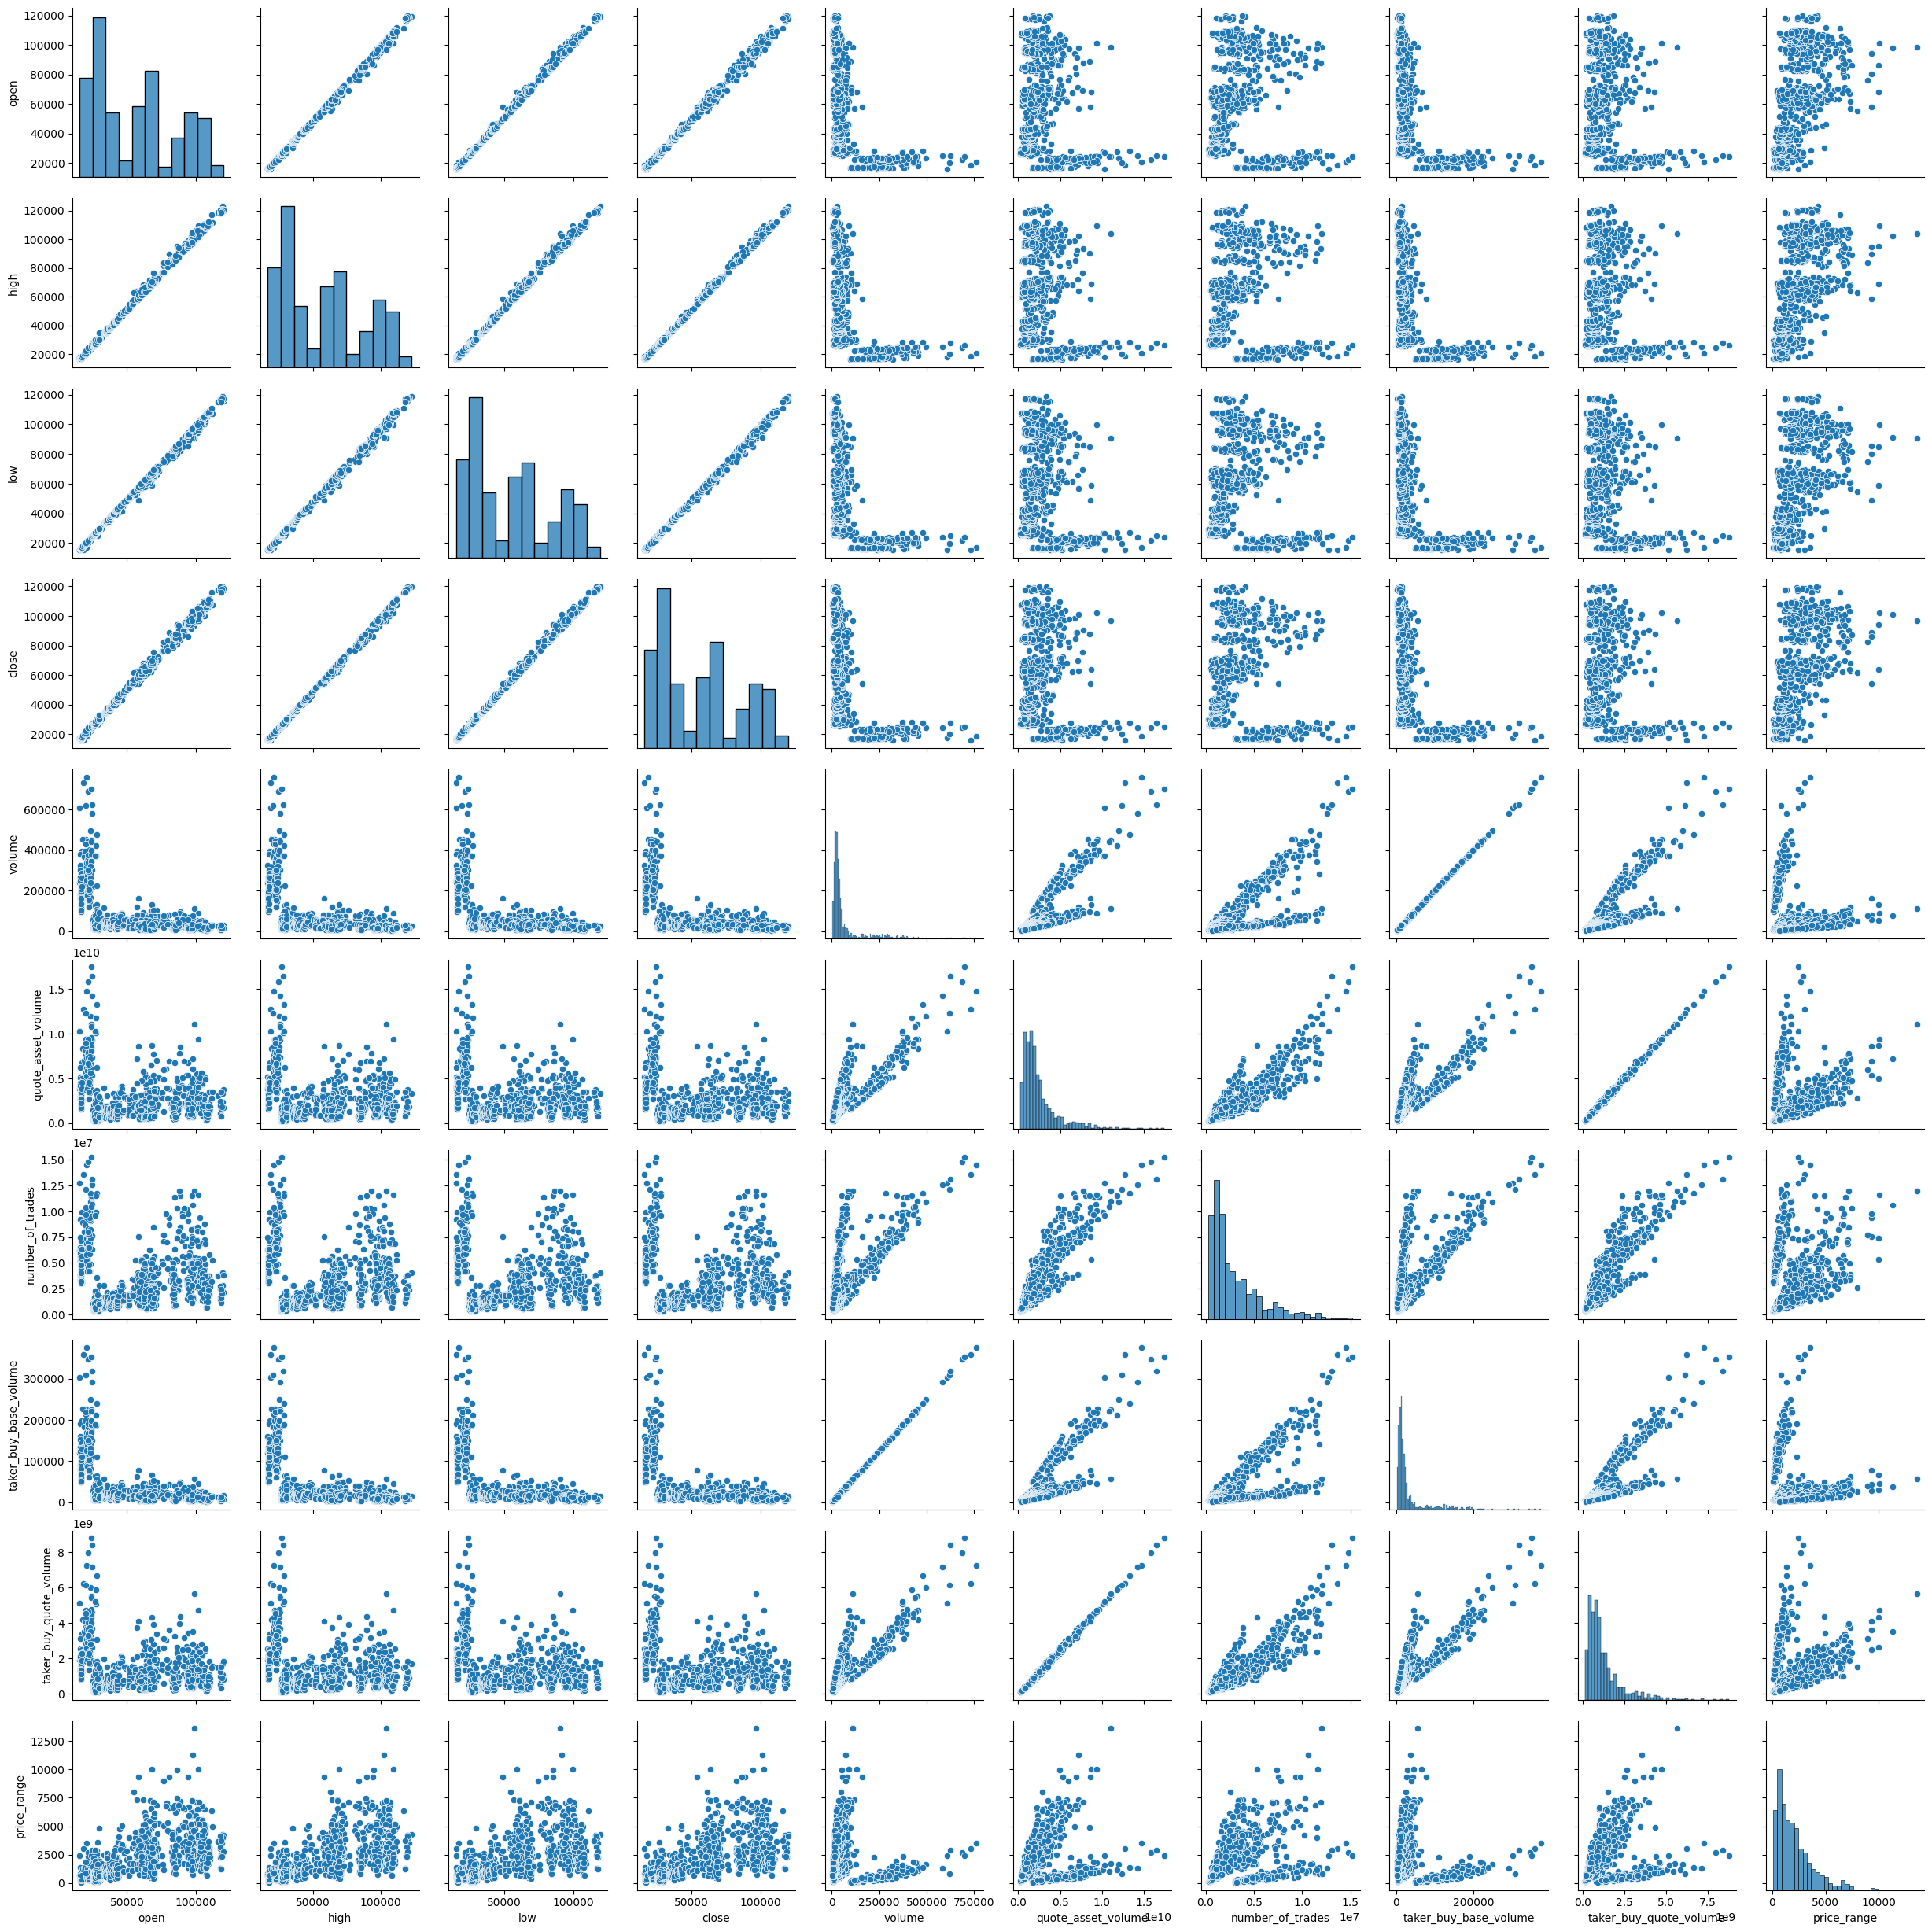

In [8]:
sns.pairplot(data=df)

In [9]:
df.isnull().sum()

timestamp                 0
open                      0
high                      0
low                       0
close                     0
volume                    0
close_time                0
quote_asset_volume        0
number_of_trades          0
taker_buy_base_volume     0
taker_buy_quote_volume    0
price_range               0
dtype: int64

In [11]:
df.drop(columns={'timestamp','close_time'},inplace=True)

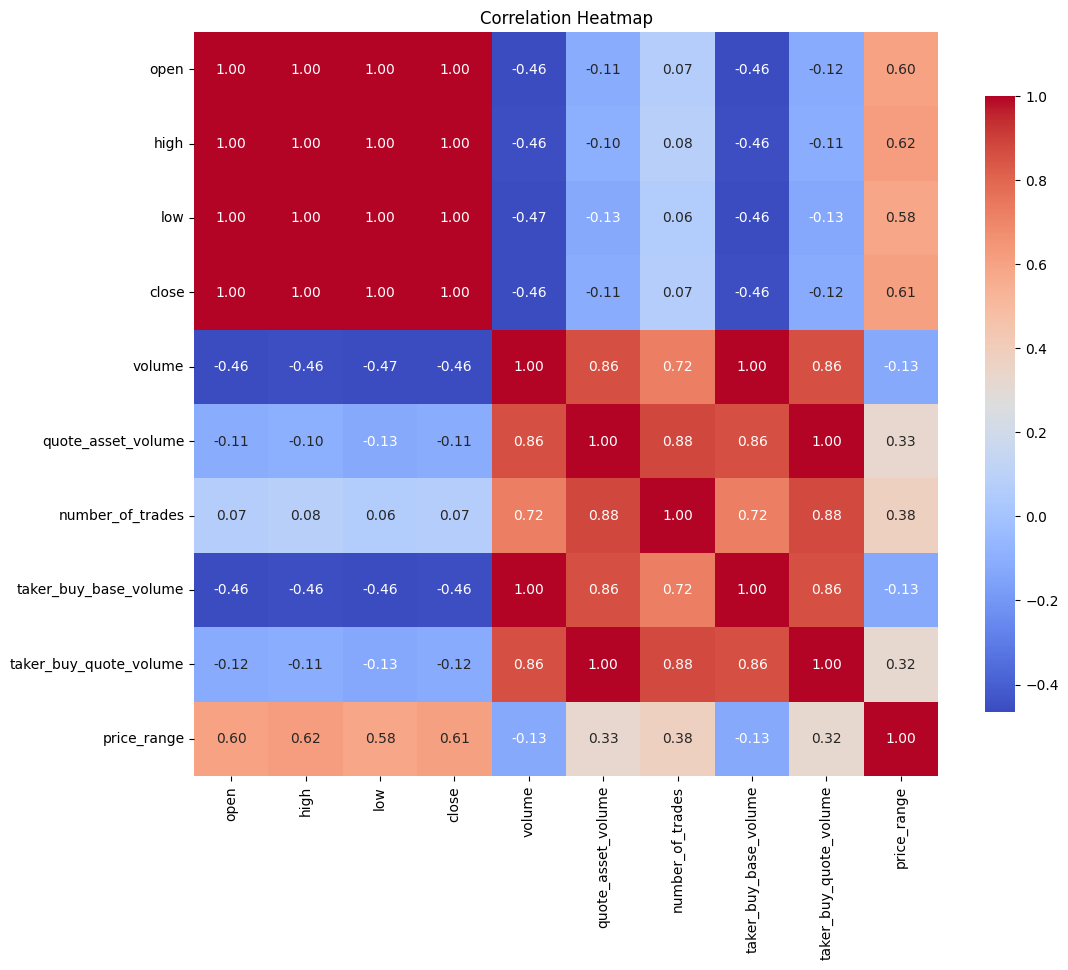

In [12]:
# plot heatmap to know which columns contribute more in predicting the close price
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df.drop(columns={'volume','quote_asset_volume','taker_buy_base_volume','taker_buy_quote_volume'},inplace=True)

In [15]:
df.head()

,open,high,low,close,number_of_trades,price_range
0,20809.68,20931.21,20515.00,20627.48,4920007,416.21
1,20627.48,20845.92,20237.95,20490.74,6571526,607.97
2,20490.74,20700.00,20330.74,20483.62,5971938,369.26
3,20482.81,20800.00,20048.04,20151.84,7431698,751.96
4,20151.84,20393.32,20031.24,20207.82,6948227,362.08


In [16]:
X = df.drop(columns=["close"]).values
y = df["close"].values

split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[0.95685629, 0.93884461, 0.89827336, 0.27960729, 0.47866042],
       [0.8984074 , 0.87956768, 0.85730402, 0.32591978, 0.34732934],
       [0.87744516, 0.85907256, 0.84286557, 0.38331723, 0.3037378 ],
       [0.84968587, 0.86400183, 0.85402194, 0.35007605, 0.26313795],
       [0.87374288, 0.85547209, 0.87211645, 0.07948501, 0.08474858],
       [0.87234713, 0.85980899, 0.87077482, 0.09039327, 0.12320474],
       [0.87173928, 0.86513179, 0.82119525, 0.36412571, 0.48907474],
       [0.87164012, 0.88067972, 0.87784284, 0.28311845, 0.21835506],
       [0.89404947, 0.91665334, 0.90181488, 0.2130456 , 0.30398125],
       [0.93761774, 0.91866034, 0.91111006, 0.23147347, 0.25585297],
       [0.93197262, 0.97297008, 0.94022271, 0.2397987 , 0.43218152],
       [0.97724168, 0.96344858, 0.96612028, 0.20736033, 0.19516075],
       [0.98254048, 0.97902421, 0.93689288, 0.3326732 , 0.49555094],
       [0.94685069, 1.01341837, 0.93576205, 0.75687548, 0.73731121],
       [0.95712634, 0.98791597, 0.

In [18]:
import pandas as pd
import numpy as np

# Sklearn models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regressor': SVR(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Kneighbour Regressor': KNeighborsRegressor(),
    'Ridge':Ridge(),
    'Lasso': Lasso()
    
}

# Model Evaluation
# ================================
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    results.append({
        'Model': name,
        'MSE': round(mse, 2),
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2)
    })

# ================================
# Results DataFrame
# ================================
results_df = pd.DataFrame(results)
print(results_df)


                      Model           MSE       MAE      RMSE
0         Linear Regression  1.030490e+06    716.41   1015.13
1  Support Vector Regressor  3.529171e+09  58433.62  59406.83
2             Random Forest  2.032609e+07   2928.01   4508.45
3             Decision Tree  1.735619e+07   2762.19   4166.08
4         Gradient Boosting  1.685790e+07   2524.87   4105.84
5      Kneighbour Regressor  4.284888e+07   4993.94   6545.91
6                     Ridge  2.273664e+06   1180.07   1507.87
7                     Lasso  1.356937e+06    870.14   1164.88


In [19]:
df.head()

,open,high,low,close,number_of_trades,price_range
0,20809.68,20931.21,20515.00,20627.48,4920007,416.21
1,20627.48,20845.92,20237.95,20490.74,6571526,607.97
2,20490.74,20700.00,20330.74,20483.62,5971938,369.26
3,20482.81,20800.00,20048.04,20151.84,7431698,751.96
4,20151.84,20393.32,20031.24,20207.82,6948227,362.08


In [20]:
# 🔍 Hyperparameter tuning: Linear Regression
# --------------------------------------
lr_param_grid = {
    'fit_intercept': [True, False]
}

lr_grid = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=lr_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

lr_grid.fit(X_train, y_train)

# --------------------------------------
# 🔍 Hyperparameter tuning: Lasso Regression
# --------------------------------------
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100],
    'max_iter': [1000, 5000, 10000],
    'tol': [1e-4, 1e-3, 1e-2],
    'selection': ['cyclic', 'random']
}

lasso_grid = GridSearchCV(
    estimator=Lasso(random_state=42),
    param_grid=lasso_param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=1
)

lasso_grid.fit(X_train, y_train)

# --------------------------------------
# ✅ Best Estimators
# --------------------------------------
best_lr = lr_grid.best_estimator_
best_lasso = lasso_grid.best_estimator_

print("Best Linear Regression Params:", lr_grid.best_params_)
print("Best Lasso Params:", lasso_grid.best_params_)

# --------------------------------------
# 📊 Evaluation
# --------------------------------------
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    }

results = []

results.append(evaluate_model("Linear Regression (Tuned)", best_lr, X_test, y_test))
results.append(evaluate_model("Lasso Regression (Tuned)", best_lasso, X_test, y_test))

# Final Results DataFrame
results_df = pd.DataFrame(results)
print("\n📊 Final Comparison Results:")
print(results_df)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Linear Regression Params: {'fit_intercept': True}
Best Lasso Params: {'alpha': 0.01, 'max_iter': 10000, 'selection': 'random', 'tol': 0.0001}

📊 Final Comparison Results:
                       Model           MSE         MAE         RMSE
0  Linear Regression (Tuned)  1.030490e+06  716.413354  1015.130631
1   Lasso Regression (Tuned)  1.029777e+06  717.174476  1014.779512


In [21]:
X_train

array([[0.05565306, 0.05015548, 0.05608517, 0.30907505, 0.02532912],
       [0.05363651, 0.0492288 , 0.05300155, 0.41982059, 0.03951875],
       [0.0521231 , 0.04764336, 0.05403432, 0.37961415, 0.02185497],
       ...,
       [0.91190532, 0.89597156, 0.91310972, 0.08376263, 0.08803626],
       [0.9124182 , 0.89660629, 0.91046073, 0.09219951, 0.10997041],
       [0.914002  , 0.9361894 , 0.91761979, 0.23757208, 0.3319565 ]])

In [22]:
linear_model = LinearRegression(fit_intercept=True)

# Lasso Regression with tuned params
lasso_model = Lasso(
    alpha=0.001,
    max_iter=5000,
    tol=1e-4,
    selection='cyclic',
    random_state=42
)

# Fit both models
linear_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

# -----------------------------------------
# Evaluation Function
# -----------------------------------------
def evaluate(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return {
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse
    }

# Evaluate both
results = []
results.append(evaluate("Linear Regression (Manual)", linear_model, X_test, y_test))
results.append(evaluate("Lasso Regression (Manual)", lasso_model, X_test, y_test))

# Results as DataFrame
results_df = pd.DataFrame(results)
print("\n Evaluation Results for Manually Tuned Models:")
print(results_df)


 Evaluation Results for Manually Tuned Models:
                        Model           MSE         MAE         RMSE
0  Linear Regression (Manual)  1.030490e+06  716.413354  1015.130631
1   Lasso Regression (Manual)  1.030192e+06  716.696650  1014.983742


In [23]:
import pickle

# Save Linear Regression model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(linear_model, f)

# Save Lasso Regression model
with open('lasso_model.pkl', 'wb') as f:
    pickle.dump(lasso_model, f)

In [24]:
# Save Lasso Regression model
with open('minmax.pkl', 'wb') as f:
    pickle.dump(scaler, f)